                                  SENTIMENT ANALYSIS PROJECT
                                  NAME:SUSAN WANJIRU 
                                  PHASE 4


BUSINESS UNDERSTANDING

We live in a world that most people use social platforms in communication and expressing how they feel about a certain topic.

Sentiment analysis, a natural language processing (NLP) technique, is a powerful tool that helps businesses understand the overall mood behind customer feedback, whether positive, negative, or neutral.

By analyzing tweets, companies can monitor their brand reputation, gauge customer satisfaction, and even identify areas of improvement for their products.

PROBLEM STATEMENT

Best buy, a leading reseller of iPhone and Google products, faces the challenge of stocking its inventory to match customer preferences. The absence of a systematic approach to analyze user sentiments on platforms like Twitter hinders data-driven stocking decisions. This project aims to leverage Twitter sentiment analysis to understand customer opinions better. By gaining insights into user sentiments, Best Buy seeks to improve stocking decisions, ensuring availability of products aligned with customer preferences and enhancing overall satisfaction and loyalty

**MAIN OBJECTIVES**

1. Improve resource allocation
By using the twitter analysis ,Google and Apple will be able to know which resources are preffered by customers according to how most of them react to the different products.

2.Enhance customer satisfaction
The sentiments from various customers will be able to predict to the companies on what products are most liked by the customers and how they can improve them inorder to make them like the products better.

3.Increase companys profitability.
Ultimately,when the customers are satisfied with the products provided by the companies ,their sentiments on twitter will sell the products to other custoers who never knew about their products ,therefore this wil increase the sales of the companies therfore increasing the profits.


DATA COLLECTION

The dataset used for this analysis was sourced from the CrowdFlower dataset available on Data.World. Here is the link to the data. https://data.world/crowdflower/brands-and-product-emotions


DATA LOADING AND IMPORTING RELEVANT LIBRARIES.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import re
import nltk
import pandas as pd


#scipy
from scipy.sparse import csr_matrix

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

#xgboost
import xgboost as xgb

#nlkt
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords


import joblib


In [157]:
df = pd.read_csv(r"C:\Users\hp\Desktop\sentiment analysis\Sentiments_analysis.csv", encoding='unicode_escape')
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


DATA DESCRIPTION

In [158]:
#GETTING GENERAL INFORMATION ON NON-NULL COUNTS AND DATA TYPES FOR PER COLUMN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The dataset consists of 9,093 rows and contains 3 columns:

**1.Column 0 (tweet_text)**

It has 9092 Values and 1 missing value.

**2.Column 1 (emotion_in_tweet_is_directed_at)**

It has 3291 Values and 5802 missing value.

**3.Column 2 (is_there_an_emotion_directed_at_a_brand_or_product)**

It has 9093 Values

The datatype  in all the columns is object(typically strings)

DATA CLEANING

In [159]:
#looking at data, duplicates and null valuesprint
def data_summary(df):
    # Print the DataFrame info
    print(df.info())
    print(("-" * 20))
    
    # Print the total number of duplicated rows
    print('Total duplicated rows')
    print(df.duplicated().sum())
    print(("-" * 20))
    # Print the total number of null values in each column
    print('Total null values')
    
    print(df.isna().sum())    
data_summary(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64



Data Analysis Summary

The dataset contains **9,093 rows and 3 columns**, with **tweet_text missing 1 value and emotion_in_tweet_is_directed_at missing 5,802 values**. There are **22 duplicated rows**, and **the column is_there_an_emotion_directed_at_a_brand_or_product has no missing values.**


SENTIMENT VISUALIZATION

In [160]:
#Sentiment Breakdown and Visualization
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts() 

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

<Axes: xlabel='is_there_an_emotion_directed_at_a_brand_or_product', ylabel='count'>

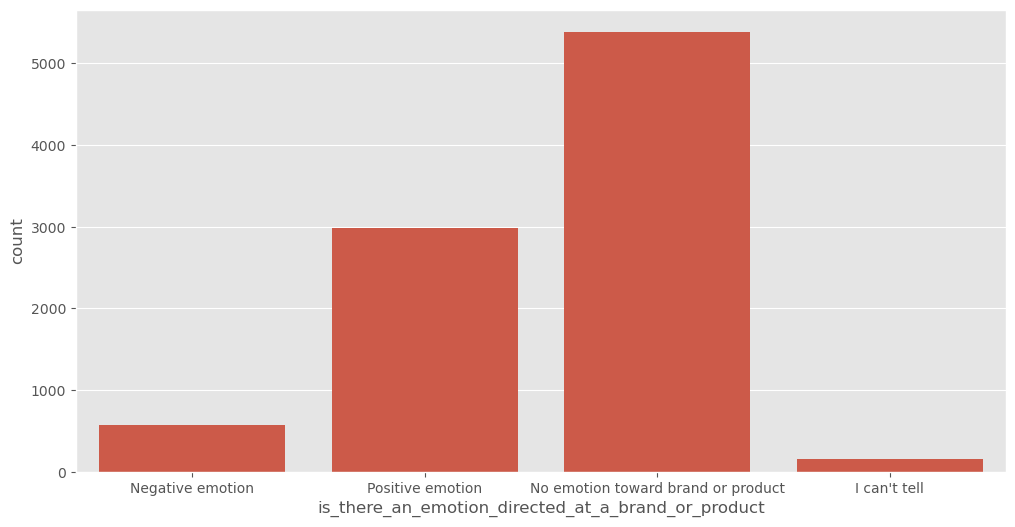

In [161]:
# Plot the sentiment breakdown for 'is_there_an_emotion_directed_at_a_brand_or_product'
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

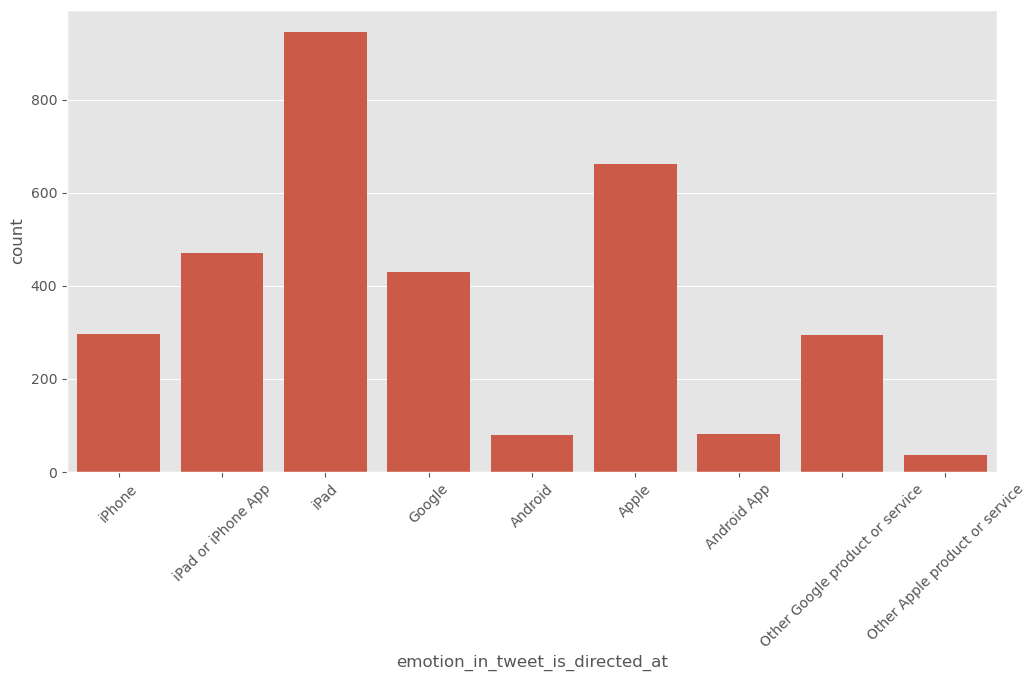

In [162]:
# Plot the sentiment breakdown for 'emotion_in_tweet_is_directed_at'

fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.xticks(rotation=45);


Summary of Sentiment Breakdown:

The bar chart reveals that **iPad** is the most frequently mentioned product in the tweets, followed by other **Apple products** (iPad, iPhone, and Apple) and **Google products**. **Android-related products** receive fewer mentions, highlighting the dominance of Apple products in user-directed sentiments.


RENAME THE LONGATED TITLE WORDS

In [163]:
# Renaming the columns
data_new= df.rename(columns={
    'emotion_in_tweet_is_directed_at':'product_brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

# Display the updated columns
print(data_new.columns)

Index(['tweet_text', 'product_brand', 'sentiment'], dtype='object')


In [164]:
# Displaying the first few rows of the DataFrame
data_new.head()

,tweet_text,product_brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


FILL MISSING VALUES

In [195]:
# Using SimpleImputer to fill missing values with a constant strategy

imputer_mode = SimpleImputer(strategy='constant')
data = pd.DataFrame(imputer_mode.fit_transform(data_new), columns=data_new.columns)
data.isna().sum()

tweet_text       0
product_brand    0
sentiment        0
dtype: int64

Identify duplicates and drop them

In [196]:

# Identify duplicates
duplicates = data[data.duplicated()]
# Display the 22 duplicates, if available
duplicates.head()

,tweet_text,product_brand,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,missing_value,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,missing_value,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion


In [ ]:
# handling the duplicates 

data.drop_duplicates(subset=None, keep="first", inplace=True)


In [ ]:
data.shape

(9071, 3)

In [199]:
# Create a working dataframe with easier column name
df = data.copy(deep=True)
df.dropna(subset=['tweet_text'], inplace=True)

# Convert the data types to string
df['tweet_text'] = df['tweet_text'].astype(str)
df['brand_item'] = df['product_brand'].astype(str)

# Brand name mapping
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }

df['product_brand'] = df['product_brand'].map(brand)

# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'neutral'}

df['sentiment'] = df['sentiment'].map(label_encoder)
df = df[df['sentiment'] != 'confused']    # drop the rows containing 'confused' labels

In [200]:
df.sentiment.value_counts(normalize=True)

sentiment
neutral     0.609810
positive    0.327505
negative    0.062686
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Brand Item Distribution')

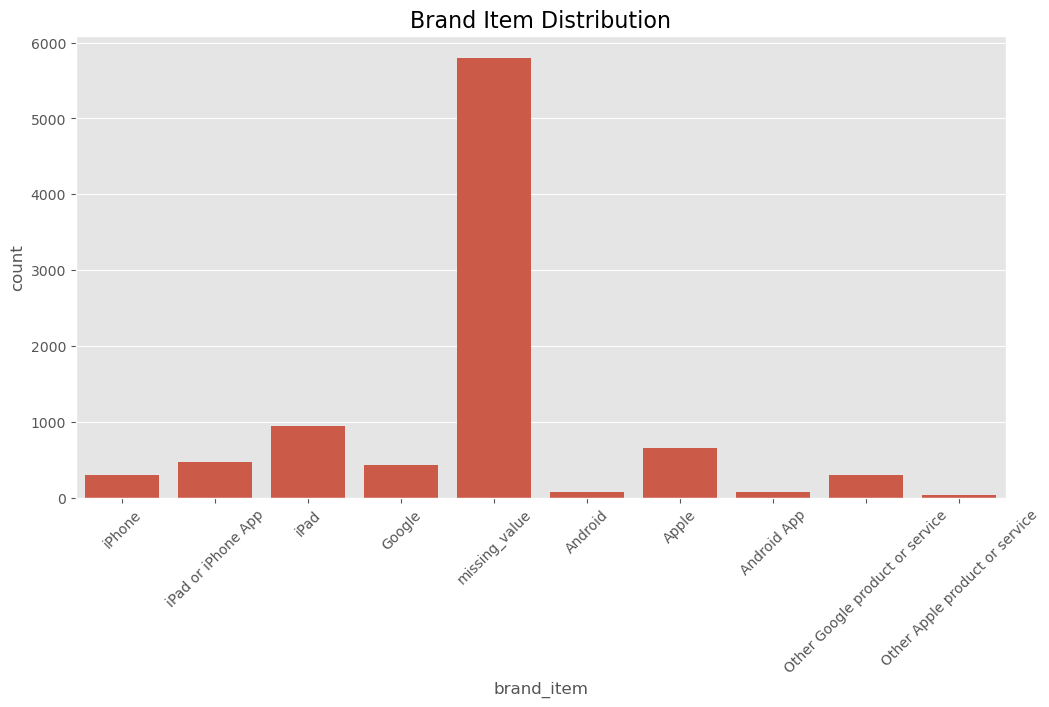

In [201]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_item', data=df)
plt.xticks(rotation=45);
plt.title('Brand Item Distribution', fontsize=16)



- **iPad** and **Apple** products have a noticeable presence, indicating that they are frequently mentioned in the dataset.
- **Google** and **Android** have fewer mentions compared to Apple-related products.
- Other product categories, such as **iPhone**, **iPad or iPhone App**, **Android App**, and **Other Google or Apple products or services**, have minimal representation.

In the next visualization, I'll focus on comparing **Apple** and **Google** products after mapping product brands to the **brand_item** variable. This will help me further analyze the sentiment and mentions between these two major brands.




Text(0.5, 1.0, 'Sentiment Comparison Between Apple and Google')

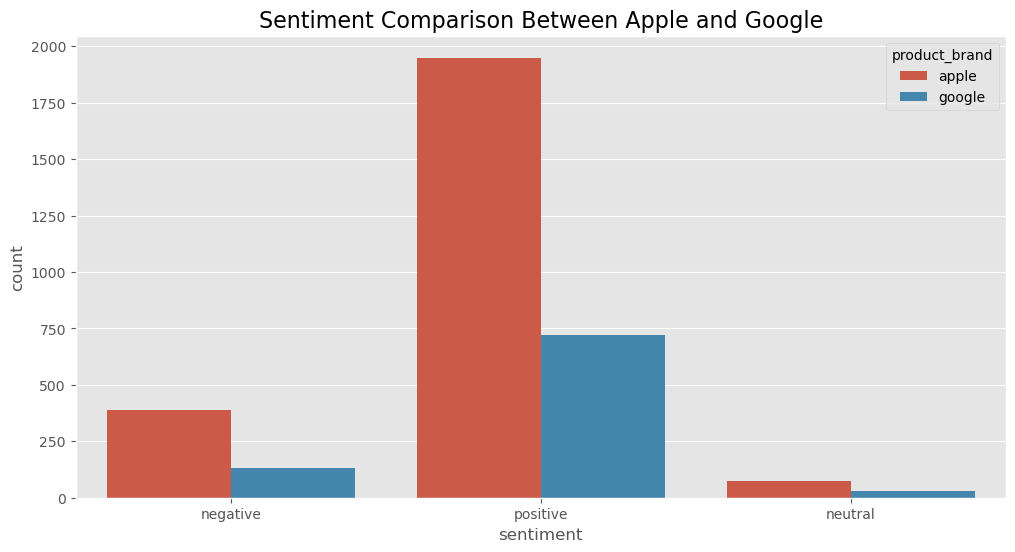

In [202]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'sentiment', hue='product_brand')
# Adding a title to the plot
plt.title('Sentiment Comparison Between Apple and Google', fontsize=16)


Sentiment Comparison Between Apple and Google:

The bar chart compares the sentiment distribution between **Apple** and **Google** products. For **positive sentiment**, Apple has a significantly higher count compared to Google, indicating a strong positive reaction toward Apple products. **Negative sentiment** is more balanced but still higher for Apple than Google. Both brands have very low counts in the **neutral sentiment** category, with Apple showing slightly more mentions than Google. This comparison suggests that Apple products generate more engagement, particularly in positive sentiment, than Google products.



### **2 Text Processing**


In this step, we will clean and prepare the `tweet_text` column by performing the following actions:

- **Removing URLs, Mentions, and Hashtags**: Eliminated URLs, Twitter mentions (e.g., @username), and hashtags (e.g., #topic) to reduce noise.
- **Removing Special Characters, Digits, and Extra Spaces**: Cleansed the text by removing non-alphabetical characters, digits, and unnecessary spaces.
- **Converting Text to Lowercase**: Standardized the text by converting all characters to lowercase.
- **Tokenizing and Removing Stopwords**: Split the text into individual tokens (words) and removed common stopwords (e.g., "the", "and") to focus on meaningful content.


In [ ]:
2.1 Data overview

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the first few cleaned tweets
print("\nFirst few cleaned tweet texts:")
print(df['cleaned_text'].head())


# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)


First few cleaned tweet texts:
0    i have a g iphone after hrs tweeting at it was...
1    know about awesome ipadiphone app that youll l...
2    can not wait for also they should sale them do...
3    i hope this years festival isnt as crashy as t...
4    great stuff on fri marissa mayer google tim or...
Name: cleaned_text, dtype: object

Dataframe shape: (9093, 5)


In [207]:
df.head()

,tweet_text,product_brand,sentiment,brand_item,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,iPhone,i have a g iphone after hrs tweeting at it was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,iPad,can not wait for also they should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,Google,great stuff on fri marissa mayer google tim or...


**MODELLING**



<small>
In this section, we will build and evaluate various machine learning models to classify sentiments in the dataset. The goal is to determine the most effective model for both binary classification (positive/negative) and multi-class classification (positive/negative/neutral).


3.1 Preparing Data for Binary or Multi-class Classification 
<small>

We begin by preparing the data for modeling. Depending on the task, we either restrict the dataset to only positive and negative sentiments for binary classification or include neutral sentiments for multi-class classification. We also encode the target sentiment labels into numerical values and prepare the features, including the processed text and product brand.
<small>

In [214]:
# Function to prepare data for binary or multi-class classification
def prepare_data(df, binary=True):
    if binary:
        # Keep only positive and negative sentiments for binary classification
        df = df[df['sentiment'].isin(['positive', 'negative'])].copy()  # Create a copy to avoid the warning
    else:
        # Include all sentiments for multi-class classification
        df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])].copy()  # Copy for safety
    
    # Encode the target variable
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment'])  # Modify copy of DataFrame
    
    # Prepare features (X) and target (y)
    X = df[['preprocessed_text', 'product_brand']]
    y = df['sentiment_encoded']
    
    return X, y, le


3.2 Vectorization using Tfi-df

<small>
The textual data is transformed into numerical form using TfidfVectorizer, which converts the preprocessed_text into a matrix of TF-IDF features. The categorical variable product_brand is also encoded using OneHotEncoder to incorporate brand information into the model. A ColumnTransformer is used to apply these transformations to the respective features
<small>

In [215]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000), 'preprocessed_text'),
        ('product_onehot', OneHotEncoder(drop='first', sparse_output=False), ['product_brand'])
    ])

3.3 Pipelines(Binary Classification )

<small>
To streamline the process of preprocessing and model training, I defineD several pipelines for different machine learning algorithms. These pipelines include:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **Gradient Boosting**
- **Neural Networks (MLPClassifier)**
- **XGBoost**


In [220]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', SVC(kernel='rbf', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    'Neural Network': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', XGBClassifier(n_estimators=100, random_state=42))
    ])
    # 'LightGBM': Pipeline([
    #     ('preprocessor', preprocessor),
    #     ('clf', LGBMClassifier(n_estimators=100, random_state=42))
    # ])
}

**TRAINING AND EVALUATION OF MODELS**

In [221]:
# Function to train and evaluate models
def train_and_evaluate(X, y, pipelines):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}")

    return results, X_test

**4.2 Train and Evaluate Binary Classification Models**

In [230]:
# Apply your filtering to be left with tweets with either postive or negative emotion
data_binary= data[data['sentiment'].isin([1, 3])]  # 1 = Negative, 3 = Positive

In [237]:
#Perform a train test split on data
X = data[['tweet_text', 'product_brand']]
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)
X_train

,tweet_text,product_brand
3473,"@mention Hey Mark, no sleep for you at #sxsw! ...",iPad
2435,I composed a tweet so acerbic and cynical abou...,iPad
2461,free #iPad Lounge open daily for #SXSW serving...,missing_value
6187,RT @mention It's not a rumor: Apple is opening...,missing_value
8359,Last minute flight change to #sxsw means I can...,iPad
...,...,...
2895,Google seems to have sabotaged my YouTube acco...,Google
7813,60% battery life on my iPhone and the conferen...,missing_value
905,Day 1 and my charger kicked the bucket. Where ...,Apple
5192,RT @mention &quot;the future of local is conte...,Google


In [238]:
# Function to encode emojis
def encode_emojis(text):
    """
    Encode emojis in text using Unicode.

    Parameters:
    text (str): Input text containing emojis.

    Returns:
    str: Text with emojis encoded using Unicode.
    """
    # Encode emojis using Unicode escape sequences
    emoji_encoded_text = text.encode('unicode-escape').decode('utf-8')
    
    return emoji_encoded_text

In [241]:
# Clean tweets for X_train data
X_train['cleaned_tweet'] = X_train['tweet_text'].apply(lambda text: encode_emojis(remove_html_urls_mentions(text)))
X_train = X_train[['tweet_text', 'cleaned_tweet', 'product_brand']].copy()
X_train

,tweet_text,cleaned_tweet,product_brand
3473,"@mention Hey Mark, no sleep for you at #sxsw! ...",Hey Mark no sleep for you at sxsw Bring me hom...,iPad
2435,I composed a tweet so acerbic and cynical abou...,I composed a tweet so acerbic and cynical abou...,iPad
2461,free #iPad Lounge open daily for #SXSW serving...,free iPad Lounge open daily for SXSW serving a...,missing_value
6187,RT @mention It's not a rumor: Apple is opening...,Its not a rumor Apple is opening up a tempora...,missing_value
8359,Last minute flight change to #sxsw means I can...,Last minute flight change to sxsw means I can ...,iPad
...,...,...,...
2895,Google seems to have sabotaged my YouTube acco...,Google seems to have sabotaged my YouTube acco...,Google
7813,60% battery life on my iPhone and the conferen...,60 battery life on my iPhone and the conferenc...,missing_value
905,Day 1 and my charger kicked the bucket. Where ...,Day 1 and my charger kicked the bucket Where t...,Apple
5192,RT @mention &quot;the future of local is conte...,quotthe future of local is contextual discove...,Google


In [245]:
# Merge brand_column into only two categories: apple and google brands
Apple = ['iPad', 'Apple', 'iPhone', 'iPad or iPhone App', 'ipad', 'apple', 'iphone', 'Other Apple product or service']
Google = ['Google', 'google', 'Other Google product or service', 'Android', 'Android App', 'android']

def brand_category(X):
    for index, row in X.iterrows():
        if row['product_brand'] in Apple:
            X.at[index, 'product_brand'] = 'Apple'
        elif row['product_brand'] in Google:
            X.at[index, 'product_brand'] = 'Google'
    
    return X

# Call function on X_train data
X_train = brand_category(X_train)

In [246]:
# Call function on X_test data
X_test = brand_category(X_test)

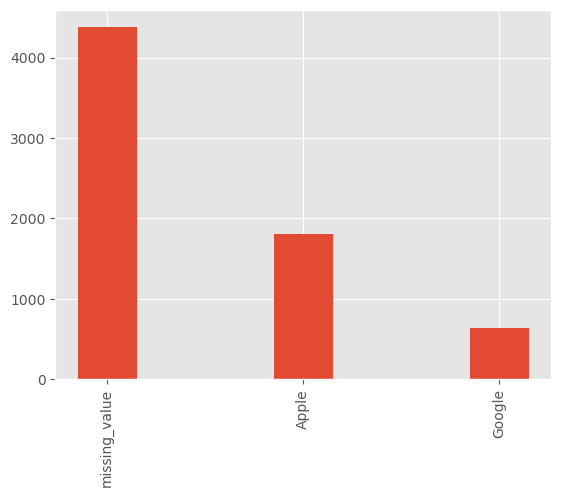

In [247]:
# Re-check brand_product column
X_train['product_brand'].value_counts()
plt.bar(X_train['product_brand'].value_counts().index, X_train['product_brand'].value_counts(), width=.3)
plt.xticks(rotation=90);

In [250]:
from string import punctuation

# Function to tokenize and remove stopwords and punctuation
def process_tweet(tweet):
    tweet = tweet.lower() #convert tweet to lowercase
    # Define a regular expression pattern to match words including apostrophes
    pattern = r"\b\w+(?:'\w+)?\b"
    # Create a RegexpTokenizer with the defined pattern
    tokenizer = RegexpTokenizer(pattern)
    # Tokenize tweet
    tokens = tokenizer.tokenize(tweet)
    tokens = [token for token in tokens if token not in stopwords.words('english') 
              and token not in punctuation]                                    #remove stopwords and punctuations
    return tokens

# Apply function on X_train and X_test data
X_train['tokenized_tweets'] = X_train['tweet_text'].apply(process_tweet)
X_test['tokenized_tweets'] = X_test['tweet_text'].apply(process_tweet)

In [251]:
# Generate Frequency distribution
FreqDist(X_train['tokenized_tweets'].explode())

FreqDist({'sxsw': 7220, 'mention': 5315, 'link': 3242, 'rt': 2227, 'ipad': 1882, 'google': 1816, 'apple': 1710, 'quot': 1207, 'iphone': 1194, 'store': 1124, ...})

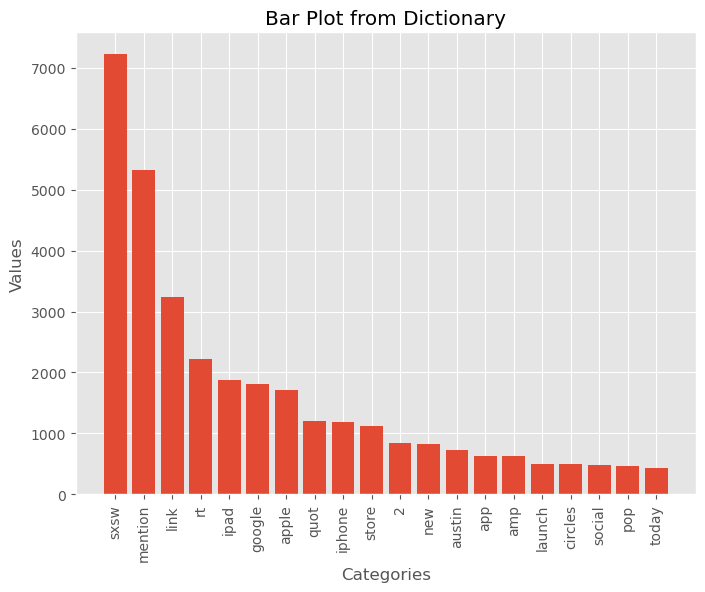

In [252]:
# Extract top 20 tokens and their values 
top_20 = FreqDist(X_train['tokenized_tweets'].explode()).most_common(20)
categories, values = zip(*top_20)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot from Dictionary')
plt.xticks(rotation=90)
plt.show()

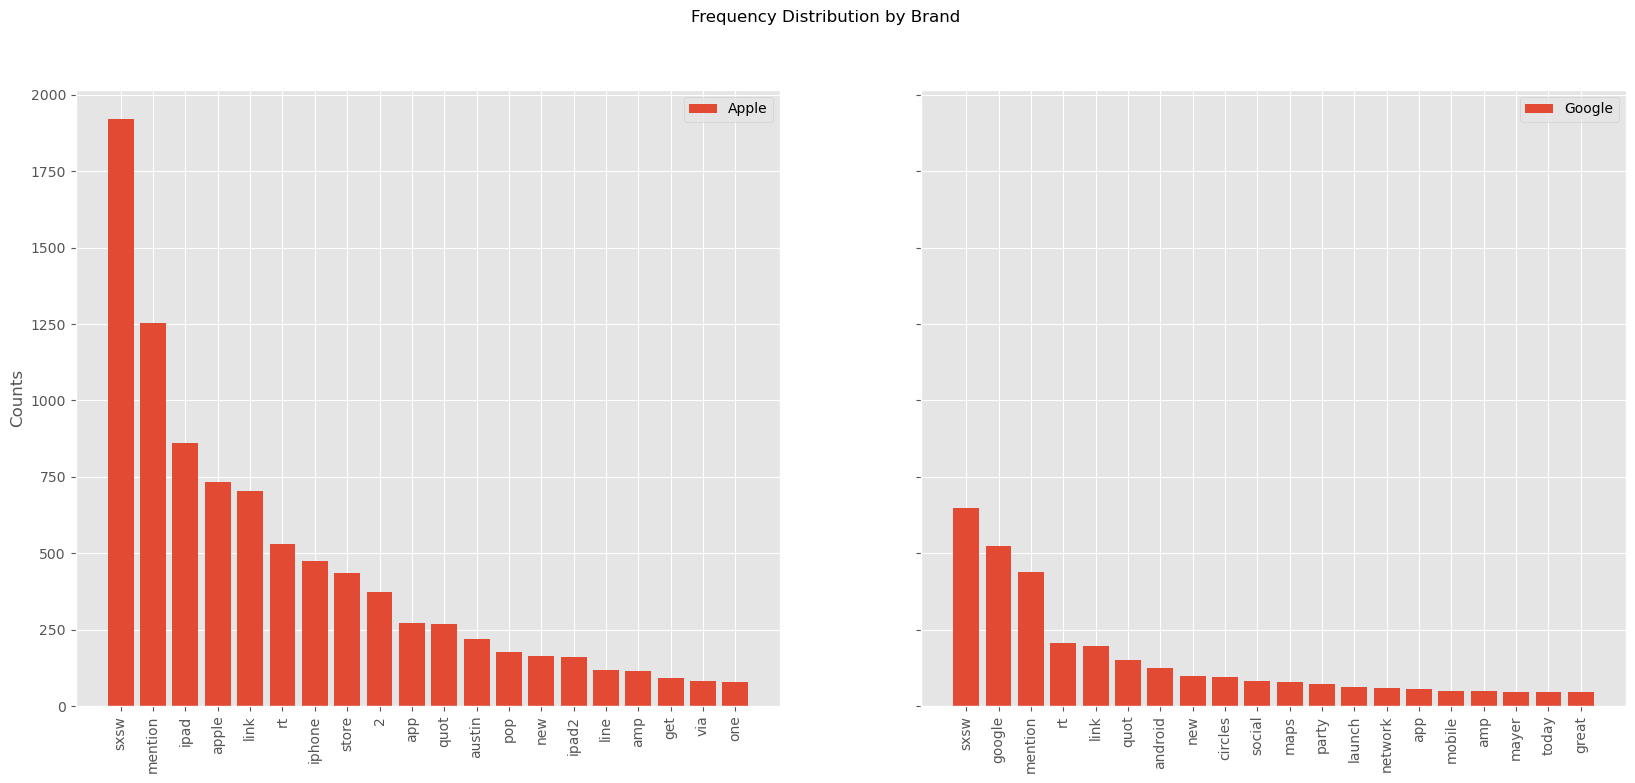

In [253]:
#check distribution by brand category
for_eda = pd.concat([X_train,y_train], axis= 1)
apple = for_eda[for_eda['product_brand'] == 'Apple']
google = for_eda[for_eda['product_brand'] == 'Google']

# Extract top 20 tokens and their values for apple brand
apple_top_20 = FreqDist(apple['tokenized_tweets'].explode()).most_common(20)
apple_categories, apple_values = zip(*apple_top_20)

# Extract top 20 tokens and their values for google brand
google_top_20 = FreqDist(google['tokenized_tweets'].explode()).most_common(20)
google_categories, google_values = zip(*google_top_20)

# Create a bar plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True) 
axes[0].bar(apple_categories, apple_values, label='Apple')
axes[1].bar(google_categories, google_values, label='Google')
axes[0].set_ylabel('Counts')
fig.suptitle('Frequency Distribution by Brand')
axes[0].set_xticks(range(len(apple_categories)))
axes[0].set_xticklabels(apple_categories, rotation=90) 
axes[1].set_xticks(range(len(google_categories)))
axes[1].set_xticklabels(google_categories, rotation=90)
# Set legends on the axes
axes[0].legend()
axes[1].legend()

plt.show()

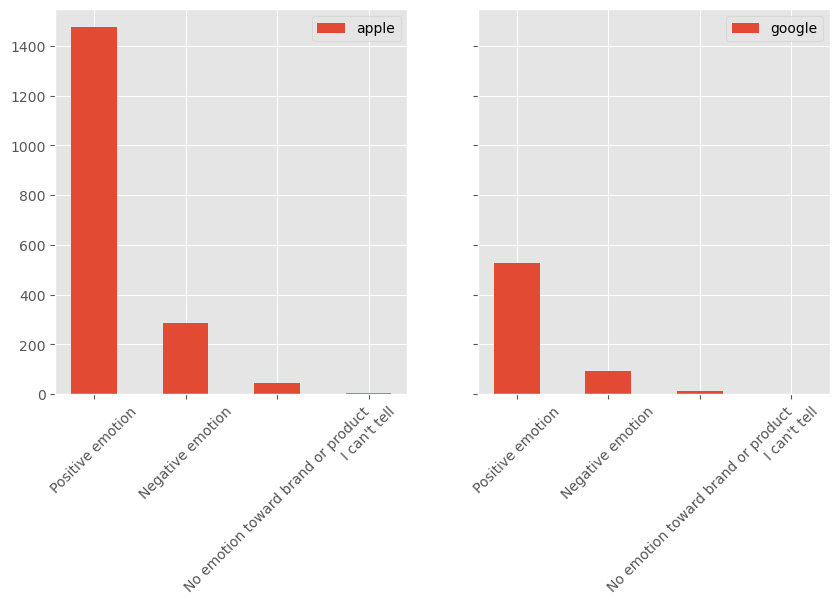

In [255]:
# Sentiments by brand
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize= (10, 5), sharey= True)
ax[0].bar(apple['sentiment'].value_counts().index, apple['sentiment'].value_counts(), width= .5, label='apple');
ax[1].bar(google['sentiment'].value_counts().index, google['sentiment'].value_counts(), width= .5, label= 'google')
ax[0].legend()
ax[1].legend()

for axis in ax:
    axis.tick_params(axis='x', rotation=45)
    
plt.show()

**SPLITTING THE DATA SET FOR A NAIVE BAYES MODEL**

This will involve splitting the new  data frame into training and testing sets for multi-class classification using the tweet_text as the input (X) and sentiment as the target (y), with 30% of the data allocated to testing and a fixed random seed (random_state=42) to ensure reproducibility

In [261]:
# Assigning the features(tweet_text) to x variable and the target (sentiment) to y variable
X = data['tweet_text']  # Features (tweet text)
y = data['sentiment']    # Target (sentiment labels)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**PIPELINE FOR NAIVE BAYES MODEL**

In [262]:
# Create pipeline with CountVectorizer and Naive Bayes classifier
pipeline_nb = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),  # Vectorization step
    ('classifier', MultinomialNB())  # Naive Bayes classifier
])

# Train the Naive Bayes model using the pipeline
pipeline_nb.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_nb.predict(X_test)

**NAIVE BAYES MODEL EVALUATION**

In [263]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display the classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6521
Classification Report:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        43
                  Negative emotion       0.53      0.13      0.21       173
No emotion toward brand or product       0.69      0.81      0.75      1597
                  Positive emotion       0.57      0.51      0.54       915

                          accuracy                           0.65      2728
                         macro avg       0.45      0.36      0.37      2728
                      weighted avg       0.63      0.65      0.63      2728



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Summary of Naive Bayes Model Performance**

The model performs reasonably well for neutral sentiment (Class 2) but struggles significantly with negative sentiment (Class 1), where recall is extremely low (15%). This means the model misses most negative tweets, which is critical for Apple and Google to address customer dissatisfaction.
The model’s performance for positive sentiment (Class 3) is moderate, but it also requires improvement to better capture positive feedback.
The poor performance on negative sentiment could result in missed opportunities to identify and address product issues, which is essential for improving customer satisfaction.


**Metrics Summary for Each Class:**
**Class 1 (Negative Sentiment):**

**Precision:** 0.62 – 62% of predicted negative tweets are actually negative.

**Recall:** 0.15 – The model only identifies 15% of actual negative tweets.

**F1-Score:** 0.24 – Poor performance in identifying negative tweets.

**Class 3 (Positive Sentiment):**

**Precision:** 0.52 – 52% of predicted positive tweets are correct.

**Recall:** 0.54 – The model correctly identifies 54% of actual positive tweets.

**F1-Score:** 0.53 – Moderate performance for positive sentiment.

**Class 2 (Neutral Sentiment):**

**Precision:** 0.73 – 73% of predicted neutral tweets are correct.

**Recall:** 0.79 – The model identifies 79% of actual neutral tweets.

**F1-Score:** 0.76 – Strong performance in classifying neutral tweets.

**Class 0 ("I can't tell" or ambiguous sentiment):**

**Precision:** 0.00 – The model fails to correctly predict any tweets in this class.

**Recall:** 0.00 – None of the actual ambiguous tweets are identified.


**3.RANDOM FOREST CLASSIFIER**

I can now initiate another pipeline that vectorizes data,  trains  ,fit and evaluates our Random Forest Model

In [264]:
# Create pipeline with CountVectorizer and Random Forest Classifier
pipeline_rf = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6661
Classification Report:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        43
                  Negative emotion       0.59      0.18      0.28       173
No emotion toward brand or product       0.67      0.88      0.76      1597
                  Positive emotion       0.67      0.42      0.51       915

                          accuracy                           0.67      2728
                         macro avg       0.48      0.37      0.39      2728
                      weighted avg       0.65      0.67      0.63      2728



FINDINGS

- Based on the analysis of customer sentiment on Twitter, it was found that Google and Apple brands had the highest number of customers expressing a neutral emotion, followed by a positive emotion. Negative sentiments were least common for both brands.
- It was observed that the SXSW event had a significant influence on customer sentiment and received the highest number of mentions. The release of new products by Apple and Google coincided with an increase in positive sentiment expressed on Twitter.
- The sentiment analysis of tweets revealed a notable amount of negativity towards the design of the iPad device. The Apple Store stood out as a feature that garnered notable positivity among users. Apple's iPhone and iPad devices received the highest positive sentiment among consumers, reinforcing their esteemed reputation within the Apple brand lineup. Among Google products and services, Android devices and Google Maps received the most mentions. 
- Pre-resampling, Naive Bayes model showed poor performance, with a recall of only 2%. However,  Random Forest demonstrated robust performance even before resampling. The resampling method led to improvements across all metrics, further enhancing the effectiveness of the classifiers.

**RECOMMENDATIONS**



- **Further Data Collection**: Given the limitations of dataset size and class imbalance, collecting a larger and more balanced dataset would greatly improve the model's performance and generalization. Consider incorporating more diverse data sources.
- **Context and Sentiment Subtlety**: The model struggles with understanding implicit and subtle expressions of sentiment. Future iterations should incorporate more sophisticated context understanding, perhaps using transfer learning with pre-trained models that can capture nuanced text meaning.
- **Real-Time Processing Capabilities**: As sentiment analysis tools are often needed in real-time applications (e.g., for social media monitoring), focus on building a scalable system that can efficiently handle large volumes of data in real time.

